# Reading

In [1]:
import fs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [2]:
RAW_PROJECT_DIR = fs.open_fs("../../data/raw/project")
RAW_FILE_NAME = RAW_PROJECT_DIR.getsyspath("hmeq.csv")

In [3]:
df = pd.read_csv(RAW_FILE_NAME)
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


/var/folders/m9/8t6hx8y11z72qfj4l01k9y740000gn/T/ipykernel_54078/1396573111.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=job_counts.values, y=job_counts.index, palette=bar_colors)


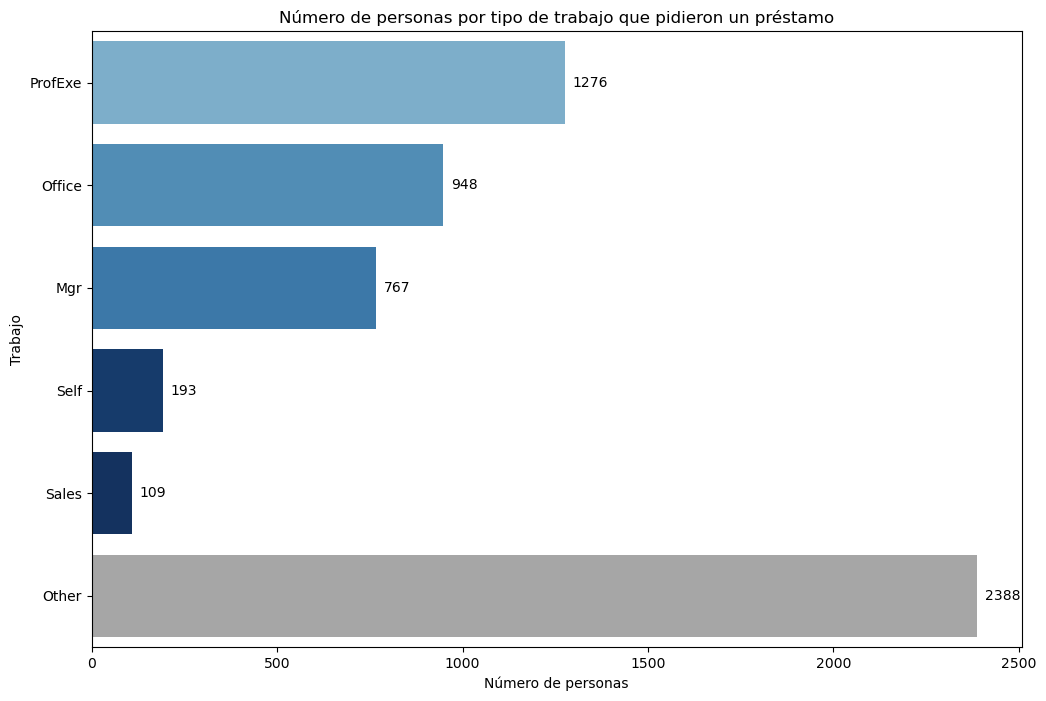

In [4]:
job_counts = df['JOB'].value_counts().sort_values(ascending=False)
job_counts = pd.concat([job_counts[job_counts.index != 'Other'], pd.Series({'Other': df['JOB'].value_counts()['Other']})])

norm = plt.Normalize(job_counts.min(), job_counts.max())
sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

bar_colors = ['#A6A6A6' if index == 'Other' else sm.to_rgba(value) for index, value in zip(job_counts.index, job_counts.values)]

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=job_counts.values, y=job_counts.index, palette=bar_colors)
plt.title('Número de personas por tipo de trabajo que pidieron un préstamo')
plt.xlabel('Número de personas')
plt.ylabel('Trabajo')

for i, v in enumerate(job_counts.values):
    ax.text(v + 20, i, str(v), color='black', va='center')

plt.show()

# Nulls [Conteo y borrado]

In [5]:
#Conteno de Datos nulos totales

null_count = df.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 5271


In [6]:
#Conteno de Datos nulos por categoria
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [7]:

#Borra los datos nulos
df_clean = df.dropna()


In [8]:
#Comprobar que se borraran los datos nulos

df_clean.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [9]:

df_clean


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


# EDA

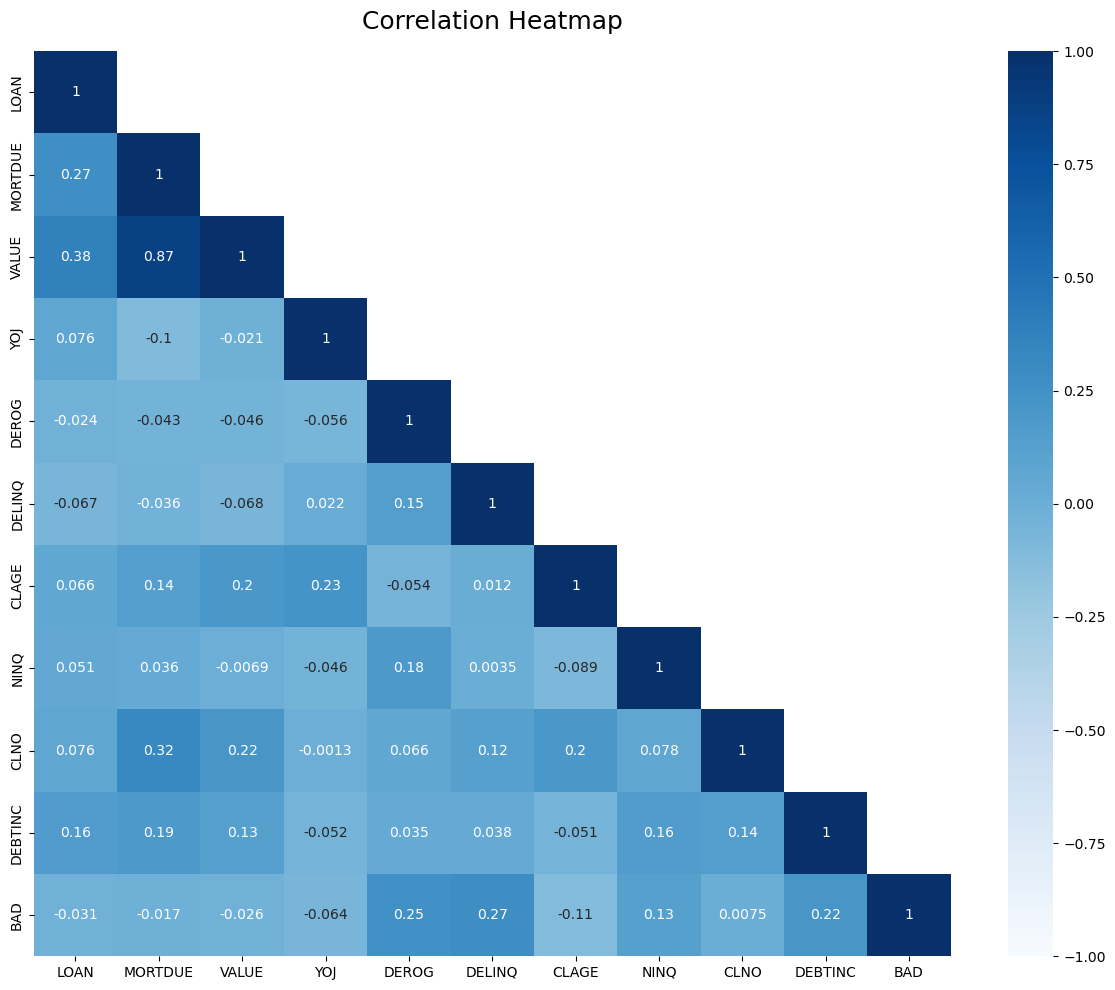

In [10]:
columns_of_interest = [
    'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ',
    'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'BAD'
]


correlation_matrix = df_clean[columns_of_interest].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='Blues', vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)

plt.tight_layout()
plt.show()


# Correlación con el monto pedido

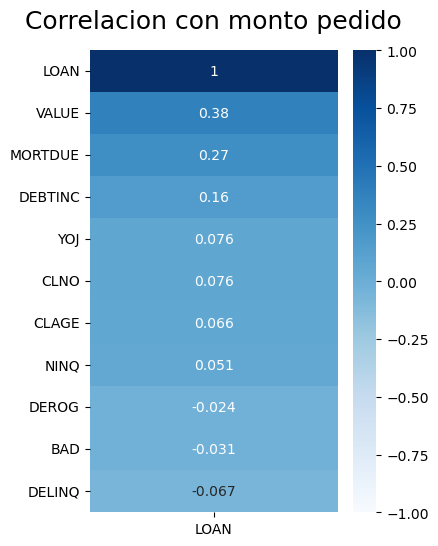

In [11]:
# Definir la variable de interés y las columnas numéricas
var_int = [
    'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ',
    'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'BAD'
]

# Crear el heatmap para la variable 'LOAN' con los datos limpios (df_clean)
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(df_clean[var_int].corr()[['LOAN']].sort_values(by='LOAN', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlacion con monto pedido', fontdict={'fontsize': 18}, pad=16)
plt.show()


El monto del préstamo (LOAN) está más fuertemente correlacionado con el valor de la propiedad (VALUE) y la deuda hipotecaria existente (MORTDUE), lo que sugiere que aquellos con más activos y deuda preexistente tienden a solicitar montos de préstamos más altos.

 Por otro lado, variables relacionadas con el historial de crédito problemático, como DELINQ y DEROG, tienen correlaciones negativas o muy débiles, lo que indica que los prestatarios con más problemas crediticios probablemente tienen acceso a préstamos más pequeños o enfrentan dificultades para obtener préstamos.

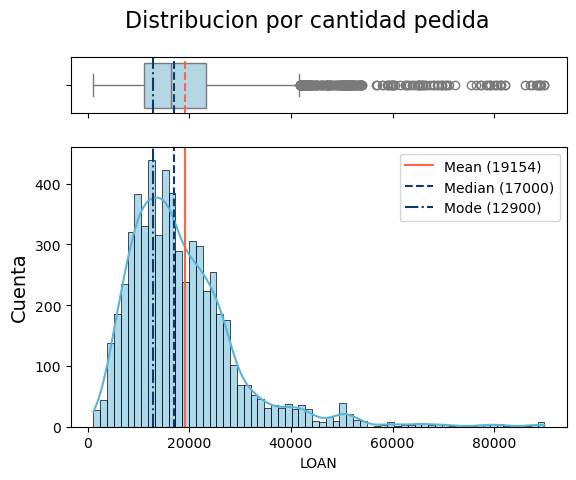

In [12]:
mean = df_clean['LOAN'].mean()
median = df_clean['LOAN'].median()
mode = df_clean['LOAN'].mode().values[0]

palette = sns.color_palette(["#0A3873", "#1261A6", "#4590BF", "#4590BF", "#5BB5D9"])

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})

sns.boxplot(data=df, x="LOAN", ax=ax_box, color="#ACD9EB")
ax_box.axvline(mean, color='tomato', linestyle='--')
ax_box.axvline(median, color=palette[0], linestyle='dashed')
ax_box.axvline(mode, color=palette[0], linestyle='dashdot')

sns.histplot(data=df, x="LOAN", ax=ax_hist, kde=True, color=palette[4])
ax_hist.axvline(mean, color='tomato', linestyle='solid', label=f"Mean ({mean:.0f})")
ax_hist.axvline(median, color=palette[0], linestyle='dashed', label=f"Median ({median:.0f})")
ax_hist.axvline(mode, color=palette[0], linestyle='dashdot', label=f"Mode ({mode:.0f})")
ax_hist.legend()

plt.ylabel('Cuenta', fontsize=14)

f.suptitle('Distribucion por cantidad pedida ', fontsize=16)
plt.show()

### Distribución del valor de la propiedad y Correlación con el monto pedido

In [13]:
from scipy.stats import pearsonr

# Suponiendo que tienes dos variables 'x' y 'y' en un DataFrame 'df'
corr, p_value = pearsonr(df_clean['VALUE'], df_clean['LOAN'])

print(f"Correlación de Pearson: {corr}")
print(f"Valor p: {p_value}")

Correlación de Pearson: 0.3787235201962147
Valor p: 3.408819187568847e-115


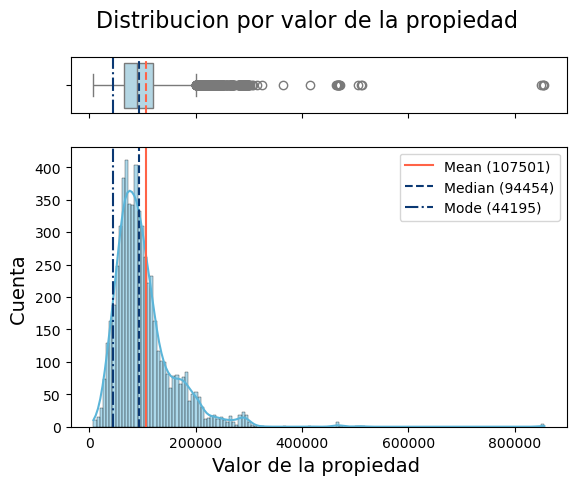

In [14]:
mean = df_clean['VALUE'].mean()
median = df_clean['VALUE'].median()
mode = df_clean['VALUE'].mode().values[0]

palette = sns.color_palette(["#0A3873", "#1261A6", "#4590BF", "#4590BF", "#5BB5D9"])

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})

sns.boxplot(data=df, x="VALUE", ax=ax_box, color="#ACD9EB")
ax_box.axvline(mean, color='tomato', linestyle='--')
ax_box.axvline(median, color=palette[0], linestyle='dashed')
ax_box.axvline(mode, color=palette[0], linestyle='dashdot')

sns.histplot(data=df, x="VALUE", ax=ax_hist, kde=True, color=palette[4])
ax_hist.axvline(mean, color='tomato', linestyle='solid', label=f"Mean ({mean:.0f})")
ax_hist.axvline(median, color=palette[0], linestyle='dashed', label=f"Median ({median:.0f})")
ax_hist.axvline(mode, color=palette[0], linestyle='dashdot', label=f"Mode ({mode:.0f})")
ax_hist.legend()

plt.ylabel('Cuenta ', fontsize=14)
plt.xlabel('Valor de la propiedad ', fontsize=14)

f.suptitle('Distribucion por valor de la propiedad ', fontsize=16)
plt.show()

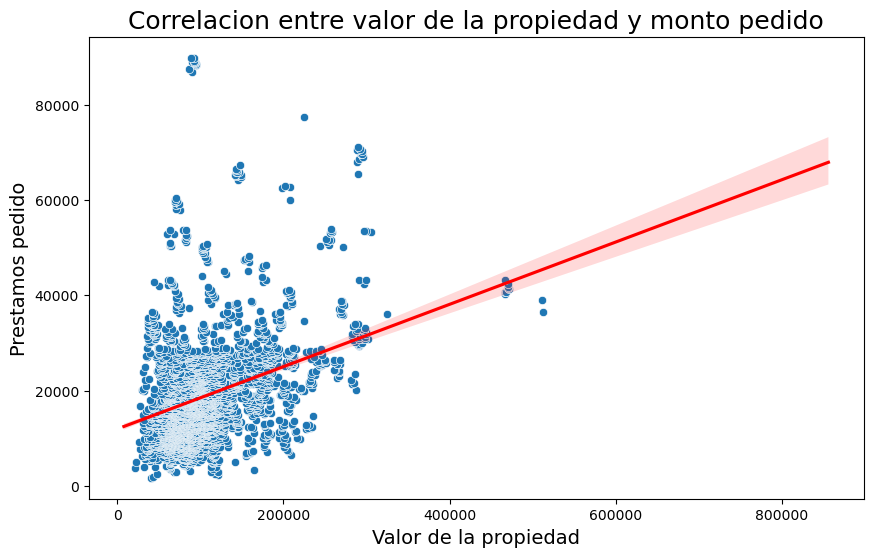

In [15]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='VALUE', y='LOAN', data=df_clean)
sns.regplot(x='VALUE', y='LOAN', data=df, scatter=False, color='red')

plt.title('Correlacion entre valor de la propiedad y monto pedido', fontsize=18)
plt.xlabel('Valor de la propiedad', fontsize=14)
plt.ylabel('Prestamos pedido', fontsize=14)

plt.show()

### Distribución del Monto adeudado en la hipoteca existente y Correlación con el monto pedido

In [16]:
from scipy.stats import pearsonr

# Suponiendo que tienes dos variables 'x' y 'y' en un DataFrame 'df'
corr, p_value = pearsonr(df_clean['MORTDUE'], df_clean['LOAN'])

print(f"Correlación de Pearson: {corr}")
print(f"Valor p: {p_value}")

Correlación de Pearson: 0.272924280220315
Valor p: 1.5469496383610444e-58


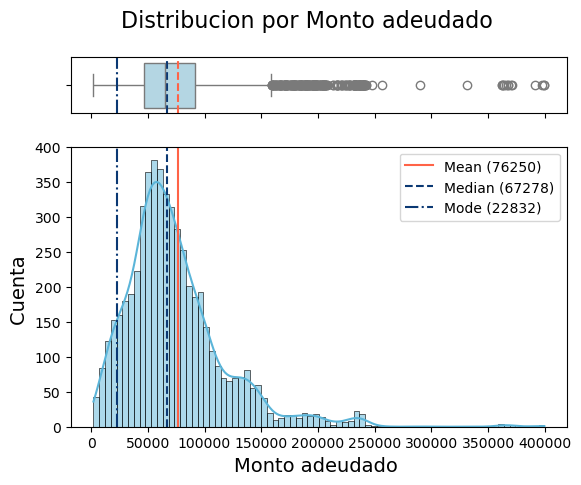

In [17]:
mean = df_clean['MORTDUE'].mean()
median = df_clean['MORTDUE'].median()
mode = df_clean['MORTDUE'].mode().values[0]

palette = sns.color_palette(["#0A3873", "#1261A6", "#4590BF", "#4590BF", "#5BB5D9"])

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})

sns.boxplot(data=df, x="MORTDUE", ax=ax_box, color="#ACD9EB")
ax_box.axvline(mean, color='tomato', linestyle='--')
ax_box.axvline(median, color=palette[0], linestyle='dashed')
ax_box.axvline(mode, color=palette[0], linestyle='dashdot')

sns.histplot(data=df, x="MORTDUE", ax=ax_hist, kde=True, color=palette[4])
ax_hist.axvline(mean, color='tomato', linestyle='solid', label=f"Mean ({mean:.0f})")
ax_hist.axvline(median, color=palette[0], linestyle='dashed', label=f"Median ({median:.0f})")
ax_hist.axvline(mode, color=palette[0], linestyle='dashdot', label=f"Mode ({mode:.0f})")
ax_hist.legend()

plt.ylabel('Cuenta ', fontsize=14)
plt.xlabel('Monto adeudado ', fontsize=14)

f.suptitle('Distribucion por Monto adeudado ', fontsize=16)
plt.show()

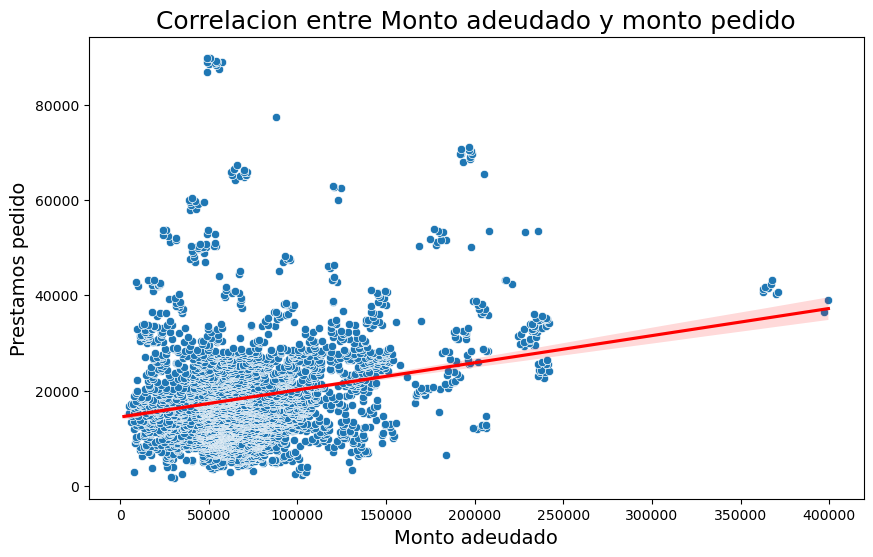

In [18]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='MORTDUE', y='LOAN', data=df_clean)
sns.regplot(x='MORTDUE', y='LOAN', data=df, scatter=False, color='red')

plt.title('Correlacion entre Monto adeudado y monto pedido', fontsize=18)
plt.xlabel('Monto adeudado', fontsize=14)
plt.ylabel('Prestamos pedido', fontsize=14)

plt.show()

### Distribución de informes de morosidad y Correlación con el monto pedido

In [19]:
from scipy.stats import pearsonr

# Suponiendo que tienes dos variables 'x' y 'y' en un DataFrame 'df'
corr, p_value = pearsonr(df_clean['DEROG'], df_clean['LOAN'])

print(f"Correlación de Pearson: {corr}")
print(f"Valor p: {p_value}")

Correlación de Pearson: -0.0242632989271633
Valor p: 0.15944060111034924


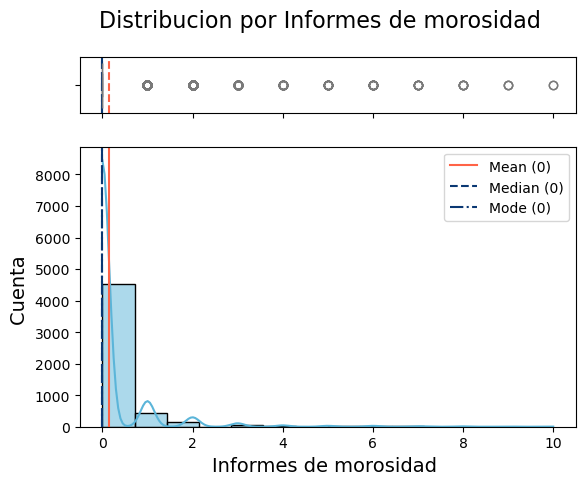

In [20]:
mean = df_clean['DEROG'].mean()
median = df_clean['DEROG'].median()
mode = df_clean['DEROG'].mode().values[0]

palette = sns.color_palette(["#0A3873", "#1261A6", "#4590BF", "#4590BF", "#5BB5D9"])

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})

sns.boxplot(data=df, x="DEROG", ax=ax_box, color="#ACD9EB")
ax_box.axvline(mean, color='tomato', linestyle='--')
ax_box.axvline(median, color=palette[0], linestyle='dashed')
ax_box.axvline(mode, color=palette[0], linestyle='dashdot')

sns.histplot(data=df, x="DEROG", ax=ax_hist, kde=True, color=palette[4])
ax_hist.axvline(mean, color='tomato', linestyle='solid', label=f"Mean ({mean:.0f})")
ax_hist.axvline(median, color=palette[0], linestyle='dashed', label=f"Median ({median:.0f})")
ax_hist.axvline(mode, color=palette[0], linestyle='dashdot', label=f"Mode ({mode:.0f})")
ax_hist.legend()

plt.ylabel('Cuenta ', fontsize=14)
plt.xlabel('Informes de morosidad ', fontsize=14)

f.suptitle('Distribucion por Informes de morosidad', fontsize=16)
plt.show()

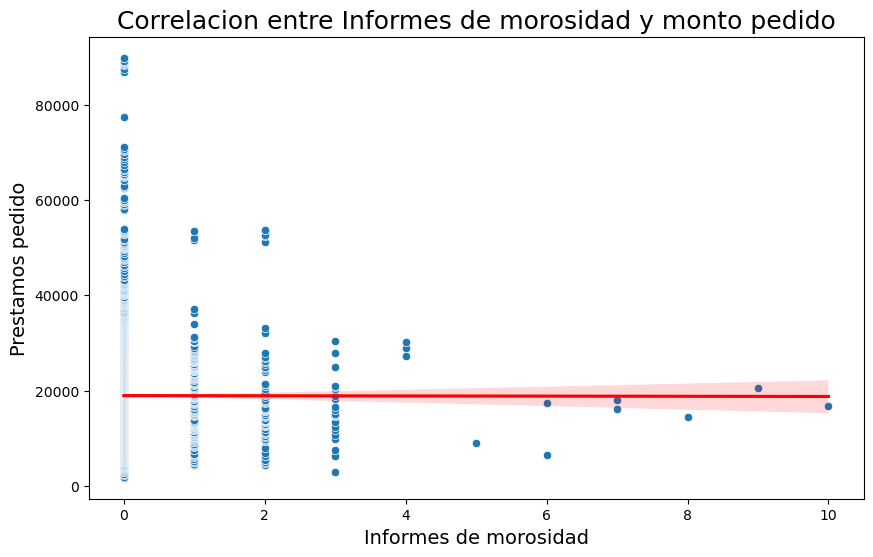

In [21]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='DEROG', y='LOAN', data=df_clean)
sns.regplot(x='DEROG', y='LOAN', data=df, scatter=False, color='red')

plt.title('Correlacion entre Informes de morosidad y monto pedido', fontsize=18)
plt.xlabel('Informes de morosidad', fontsize=14)
plt.ylabel('Prestamos pedido', fontsize=14)

plt.show()

### Distribución de Número de líneas de crédito morosas y Correlación con el monto pedido

In [22]:
from scipy.stats import pearsonr

# Suponiendo que tienes dos variables 'x' y 'y' en un DataFrame 'df'
corr, p_value = pearsonr(df_clean['DELINQ'], df_clean['LOAN'])

print(f"Correlación de Pearson: {corr}")
print(f"Valor p: {p_value}")

Correlación de Pearson: -0.06746802386333903
Valor p: 8.997292066250175e-05


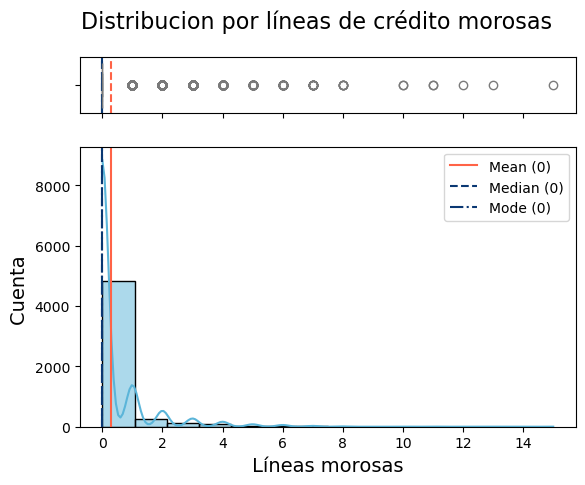

In [23]:
mean = df_clean['DELINQ'].mean()
median = df_clean['DELINQ'].median()
mode = df_clean['DELINQ'].mode().values[0]

palette = sns.color_palette(["#0A3873", "#1261A6", "#4590BF", "#4590BF", "#5BB5D9"])

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})

sns.boxplot(data=df, x="DELINQ", ax=ax_box, color="#ACD9EB")
ax_box.axvline(mean, color='tomato', linestyle='--')
ax_box.axvline(median, color=palette[0], linestyle='dashed')
ax_box.axvline(mode, color=palette[0], linestyle='dashdot')

sns.histplot(data=df, x="DELINQ", ax=ax_hist, kde=True, color=palette[4])
ax_hist.axvline(mean, color='tomato', linestyle='solid', label=f"Mean ({mean:.0f})")
ax_hist.axvline(median, color=palette[0], linestyle='dashed', label=f"Median ({median:.0f})")
ax_hist.axvline(mode, color=palette[0], linestyle='dashdot', label=f"Mode ({mode:.0f})")
ax_hist.legend()

plt.ylabel('Cuenta ', fontsize=14)
plt.xlabel(' Líneas morosas ', fontsize=14)

f.suptitle('Distribucion por líneas de crédito morosas ', fontsize=16)
plt.show()

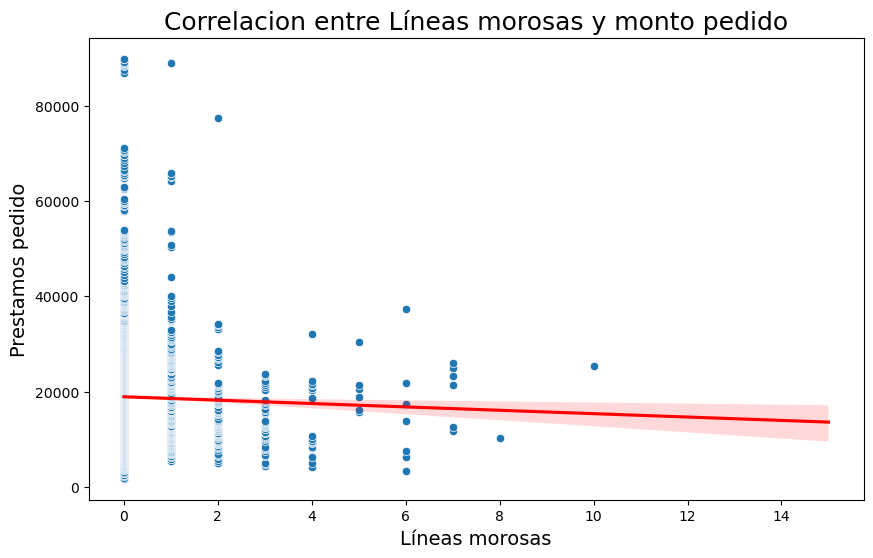

In [24]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='DELINQ', y='LOAN', data=df_clean)
sns.regplot(x='DELINQ', y='LOAN', data=df, scatter=False, color='red')

plt.title('Correlacion entre Líneas morosas y monto pedido', fontsize=18)

plt.xlabel('Líneas morosas', fontsize=14)
plt.ylabel('Prestamos pedido', fontsize=14)

plt.show()

# Correlación con incumplimiento de pago

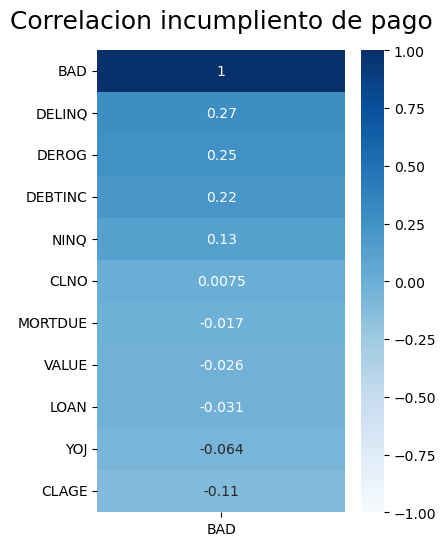

In [25]:
# Definir la variable de interés y las columnas numéricas
var_int = [
    'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ',
    'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'BAD'
]

# Crear el heatmap para la variable 'LOAN' con los datos limpios (df_clean)
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(df_clean[var_int].corr()[['BAD']].sort_values(by='BAD', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlacion incumpliento de pago', fontdict={'fontsize': 18}, pad=16)
plt.show()

DELINQ, DEROG, y DEBTINC, ya que estas están moderadamente correlacionadas con la probabilidad de incumplimiento. Las personas con más líneas de crédito morosas, un historial de morosidad grave y una alta relación deuda-ingreso son más propensas a incumplir.

Por otro lado, variables como la antigüedad de la línea de crédito (CLAGE) y los años en el empleo actual (YOJ) parecen ser factores estabilizadores que reducen el riesgo de incumplimiento

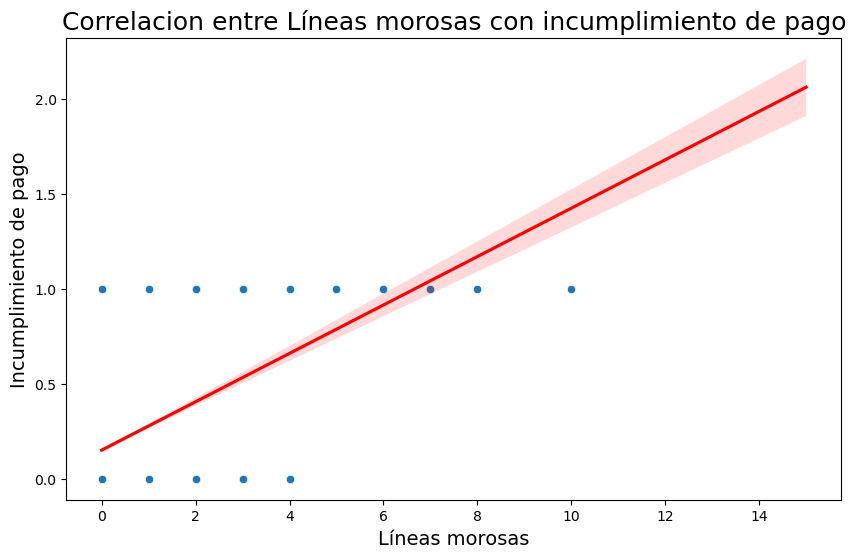

In [26]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='DELINQ', y='BAD', data=df_clean)
sns.regplot(x='DELINQ', y='BAD', data=df, scatter=False, color='red')

plt.title('Correlacion entre Líneas morosas con incumplimiento de pago', fontsize=18)

plt.xlabel('Líneas morosas', fontsize=14)
plt.ylabel('Incumplimiento de pago', fontsize=14)

plt.show()

In [27]:
from scipy.stats import pointbiserialr

corr, p_value = pointbiserialr(df_clean['BAD'], df_clean['DELINQ'])

print(f"Correlación con Líneas morosas: {corr}")
print(f"Valor p: {p_value}")

Correlación con Líneas morosas: 0.2748934302509388
Valor p: 2.1625688061857042e-59


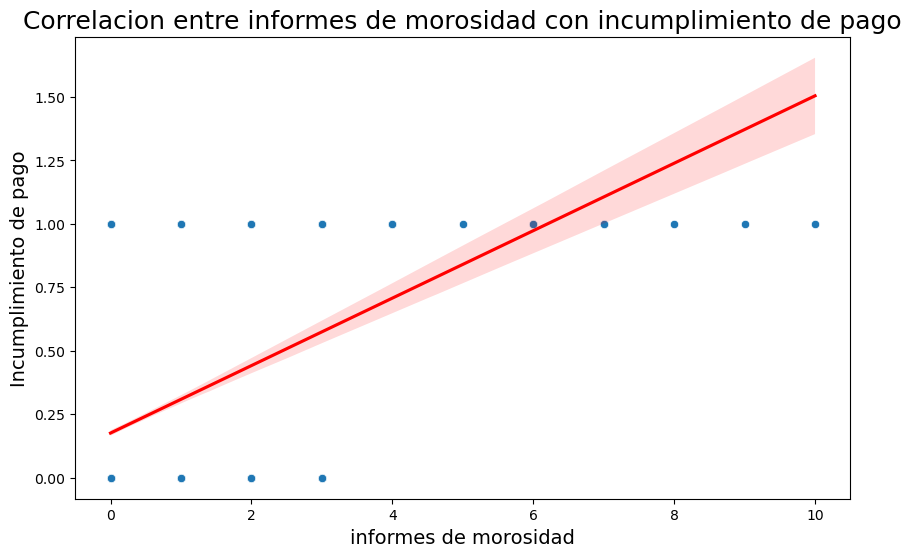

In [28]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='DEROG', y='BAD', data=df_clean)
sns.regplot(x='DEROG', y='BAD', data=df, scatter=False, color='red')

plt.title('Correlacion entre informes de morosidad con incumplimiento de pago', fontsize=18)

plt.xlabel('informes de morosidad', fontsize=14)
plt.ylabel('Incumplimiento de pago', fontsize=14)

plt.show()

In [29]:
from scipy.stats import pointbiserialr

corr, p_value = pointbiserialr(df_clean['BAD'], df_clean['DEROG'])

print(f"Correlación con informes de morosidad: {corr}")
print(f"Valor p: {p_value}")

Correlación con informes de morosidad: 0.25371072147718693
Valor p: 1.442610236325992e-50


### Distribución de Relación deuda-ingreso y Correlación con el incumplimiento de pago

In [30]:
from scipy.stats import pointbiserialr

corr, p_value = pointbiserialr(df_clean['BAD'], df_clean['DEBTINC'])

print(f"Correlación con Relación deuda-ingreso: {corr}")
print(f"Valor p: {p_value}")

Correlación con Relación deuda-ingreso: 0.21695880014659621
Valor p: 3.984168731031461e-37


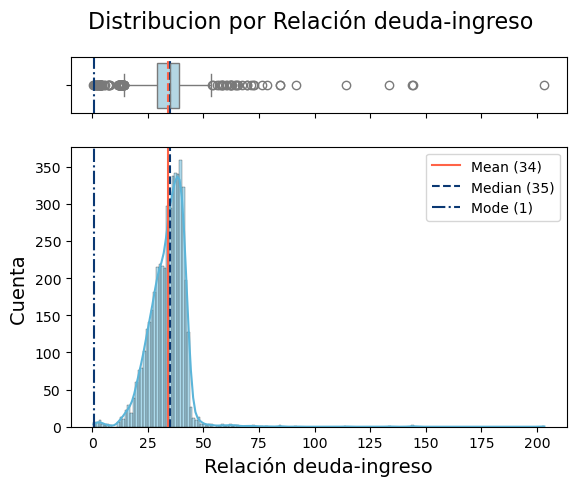

In [31]:
mean = df_clean['DEBTINC'].mean()
median = df_clean['DEBTINC'].median()
mode = df_clean['DEBTINC'].mode().values[0]

palette = sns.color_palette(["#0A3873", "#1261A6", "#4590BF", "#4590BF", "#5BB5D9"])

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})

sns.boxplot(data=df, x="DEBTINC", ax=ax_box, color="#ACD9EB")
ax_box.axvline(mean, color='tomato', linestyle='--')
ax_box.axvline(median, color=palette[0], linestyle='dashed')
ax_box.axvline(mode, color=palette[0], linestyle='dashdot')

sns.histplot(data=df, x="DEBTINC", ax=ax_hist, kde=True, color=palette[4])
ax_hist.axvline(mean, color='tomato', linestyle='solid', label=f"Mean ({mean:.0f})")
ax_hist.axvline(median, color=palette[0], linestyle='dashed', label=f"Median ({median:.0f})")
ax_hist.axvline(mode, color=palette[0], linestyle='dashdot', label=f"Mode ({mode:.0f})")
ax_hist.legend()

plt.ylabel('Cuenta ', fontsize=14)
plt.xlabel(' Relación deuda-ingreso ', fontsize=14)

f.suptitle('Distribucion por Relación deuda-ingreso', fontsize=16)
plt.show()

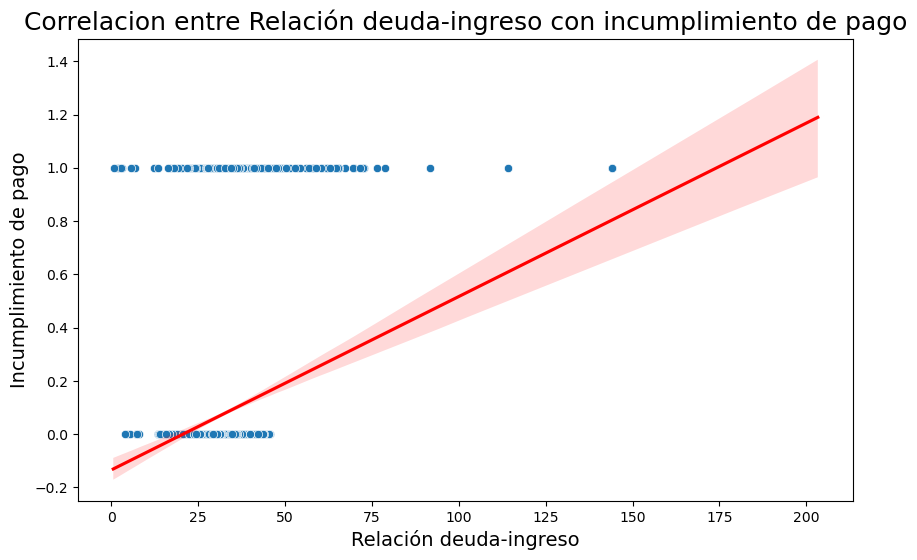

In [32]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='DEBTINC', y='BAD', data=df_clean)
sns.regplot(x='DEBTINC', y='BAD', data=df, scatter=False, color='red')

plt.title('Correlacion entre Relación deuda-ingreso con incumplimiento de pago', fontsize=18)

plt.xlabel('Relación deuda-ingreso', fontsize=14)
plt.ylabel('Incumplimiento de pago', fontsize=14)

plt.show()

### Distribución de la linea mas antigua y Correlación con el incumplimiento de pago

In [33]:
from scipy.stats import pointbiserialr

corr, p_value = pointbiserialr(df_clean['BAD'], df_clean['CLAGE'])

print(f"Correlación con  linea mas antigua: {corr}")
print(f"Valor p: {p_value}")

Correlación con  linea mas antigua: -0.11390574371847481
Valor p: 3.4572008183014556e-11


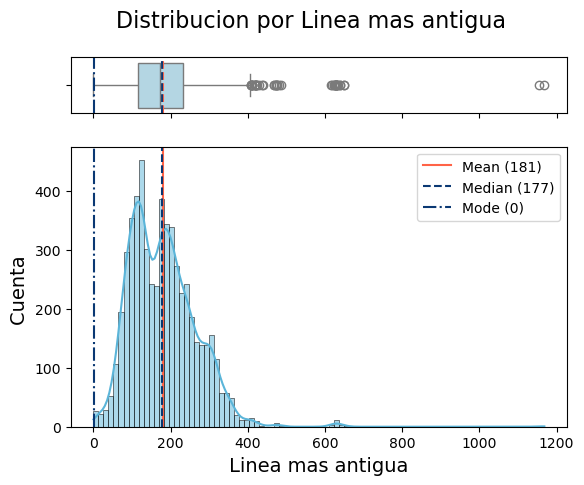

In [34]:
mean = df_clean['CLAGE'].mean()
median = df_clean['CLAGE'].median()
mode = df_clean['CLAGE'].mode().values[0]

palette = sns.color_palette(["#0A3873", "#1261A6", "#4590BF", "#4590BF", "#5BB5D9"])

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})

sns.boxplot(data=df, x="CLAGE", ax=ax_box, color="#ACD9EB")
ax_box.axvline(mean, color='tomato', linestyle='--')
ax_box.axvline(median, color=palette[0], linestyle='dashed')
ax_box.axvline(mode, color=palette[0], linestyle='dashdot')

sns.histplot(data=df, x="CLAGE", ax=ax_hist, kde=True, color=palette[4])
ax_hist.axvline(mean, color='tomato', linestyle='solid', label=f"Mean ({mean:.0f})")
ax_hist.axvline(median, color=palette[0], linestyle='dashed', label=f"Median ({median:.0f})")
ax_hist.axvline(mode, color=palette[0], linestyle='dashdot', label=f"Mode ({mode:.0f})")
ax_hist.legend()

plt.ylabel('Cuenta ', fontsize=14)
plt.xlabel(' Linea mas antigua ', fontsize=14)

f.suptitle('Distribucion por Linea mas antigua', fontsize=16)
plt.show()

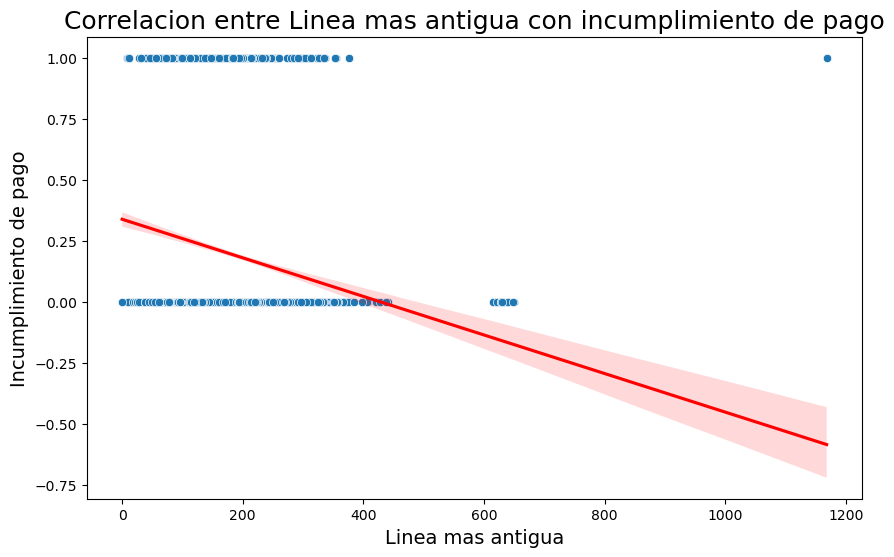

In [35]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='CLAGE', y='BAD', data=df_clean)
sns.regplot(x='CLAGE', y='BAD', data=df, scatter=False, color='red')

plt.title('Correlacion entre Linea mas antigua con incumplimiento de pago', fontsize=18)

plt.xlabel('Linea mas antigua', fontsize=14)
plt.ylabel('Incumplimiento de pago', fontsize=14)

plt.show()

### Distribución de años en el empleo actual y Correlación con el incumplimiento de pago

In [36]:
from scipy.stats import pointbiserialr

corr, p_value = pointbiserialr(df_clean['BAD'], df_clean['YOJ'])

print(f"Correlación con años en el empleo actual: {corr}")
print(f"Valor p: {p_value}")

Correlación con años en el empleo actual: -0.0642789806494424
Valor p: 0.00019098363769158328


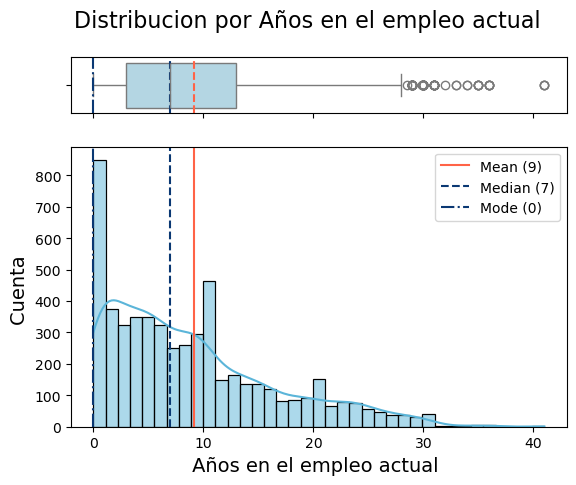

In [37]:
mean = df_clean['YOJ'].mean()
median = df_clean['YOJ'].median()
mode = df_clean['YOJ'].mode().values[0]

palette = sns.color_palette(["#0A3873", "#1261A6", "#4590BF", "#4590BF", "#5BB5D9"])

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})

sns.boxplot(data=df, x="YOJ", ax=ax_box, color="#ACD9EB")
ax_box.axvline(mean, color='tomato', linestyle='--')
ax_box.axvline(median, color=palette[0], linestyle='dashed')
ax_box.axvline(mode, color=palette[0], linestyle='dashdot')

sns.histplot(data=df, x="YOJ", ax=ax_hist, kde=True, color=palette[4])
ax_hist.axvline(mean, color='tomato', linestyle='solid', label=f"Mean ({mean:.0f})")
ax_hist.axvline(median, color=palette[0], linestyle='dashed', label=f"Median ({median:.0f})")
ax_hist.axvline(mode, color=palette[0], linestyle='dashdot', label=f"Mode ({mode:.0f})")
ax_hist.legend()

plt.ylabel('Cuenta ', fontsize=14)
plt.xlabel(' Años en el empleo actual  ', fontsize=14)

f.suptitle('Distribucion por Años en el empleo actual ', fontsize=16)
plt.show()

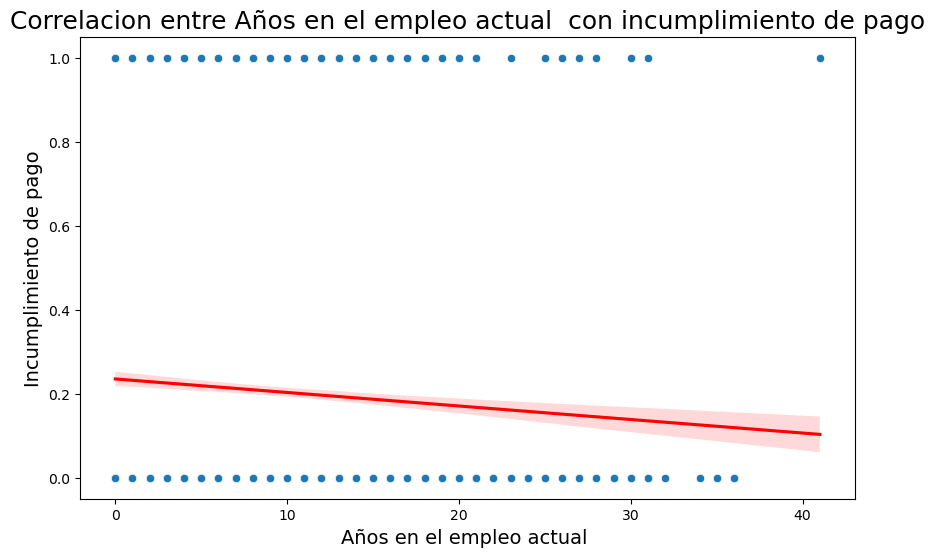

In [38]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='YOJ', y='BAD', data=df_clean)
sns.regplot(x='YOJ', y='BAD', data=df, scatter=False, color='red')

plt.title('Correlacion entre Años en el empleo actual  con incumplimiento de pago', fontsize=18)

plt.xlabel('Años en el empleo actual ', fontsize=14)
plt.ylabel('Incumplimiento de pago', fontsize=14)

plt.show()

# Correlación con Tipo de trabajo y Razón

In [39]:
# Convertir la columna JOB a variables numéricas usando One-Hot Encoding
df_clean_encoded = pd.get_dummies(df_clean, columns=['JOB'])

# Seleccionar solo las columnas numéricas
numeric_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

# Crear una matriz de correlación entre las columnas numéricas y las variables de trabajo
job_correlation_matrix = df_clean_encoded[numeric_columns + list(df_clean_encoded.columns[df_clean_encoded.columns.str.contains('JOB')])].corr()

# Mostrar la matriz de correlación
job_correlation_matrix


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
LOAN,1.000000,0.272924,0.378724,0.076359,-0.024263,-0.067468,0.066484,0.051264,0.075893,0.157379,0.044196,-0.065616,-0.070544,0.030326,-0.051740,0.218890
MORTDUE,0.272924,1.000000,0.865265,-0.103307,-0.042590,-0.035903,0.137741,0.036424,0.320759,0.185446,0.061584,-0.070627,-0.253691,0.237213,-0.025134,0.160341
VALUE,0.378724,0.865265,1.000000,-0.021113,-0.045910,-0.068415,0.197697,-0.006878,0.215466,0.130928,0.009735,-0.081197,-0.257361,0.274645,-0.033377,0.206963
YOJ,0.076359,-0.103307,-0.021113,1.000000,-0.055824,0.021976,0.230511,-0.045865,-0.001290,-0.051864,0.031660,-0.033601,0.062190,-0.025484,-0.045838,-0.067137
DEROG,-0.024263,-0.042590,-0.045910,-0.055824,1.000000,0.147825,-0.053741,0.181596,0.065897,0.035200,0.025497,-0.032297,0.036055,-0.052190,0.079170,-0.004669
DELINQ,-0.067468,-0.035903,-0.068415,0.021976,0.147825,1.000000,0.011583,0.003523,0.122612,0.038251,0.001644,0.030308,0.002583,-0.013005,-0.031784,-0.020869
CLAGE,0.066484,0.137741,0.197697,0.230511,-0.053741,0.011583,1.000000,-0.089076,0.201759,-0.050553,-0.017350,-0.023809,-0.127055,0.143905,0.019692,0.062072
NINQ,0.051264,0.036424,-0.006878,-0.045865,0.181596,0.003523,-0.089076,1.000000,0.077538,0.157328,0.115613,-0.046113,0.042175,-0.098267,-0.027707,0.026439
CLNO,0.075893,0.320759,0.215466,-0.001290,0.065897,0.122612,0.201759,0.077538,1.000000,0.143613,0.006944,0.008833,-0.164814,0.120337,0.042970,0.093455
DEBTINC,0.157379,0.185446,0.130928,-0.051864,0.035200,0.038251,-0.050553,0.157328,0.143613,1.000000,0.045540,0.020569,0.016126,-0.111437,0.034887,0.082108


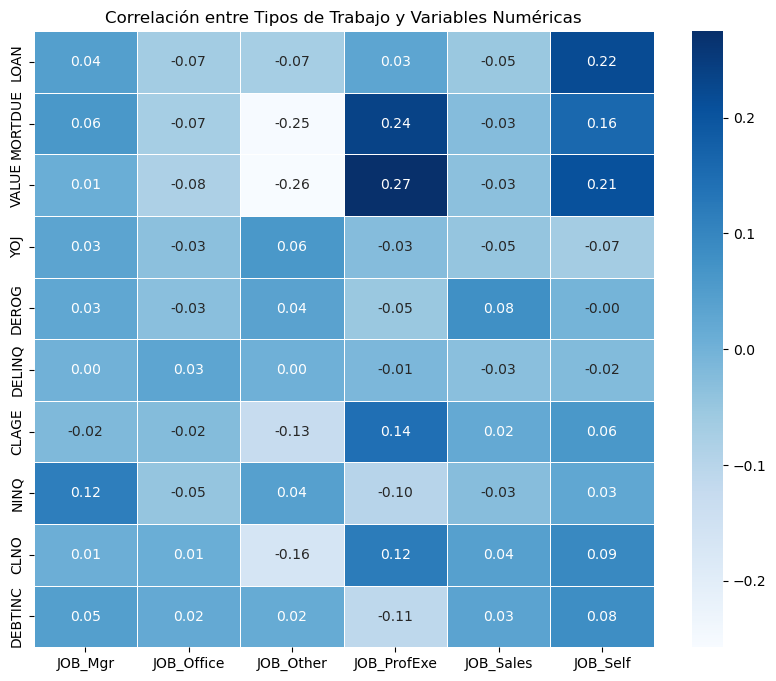

In [40]:
# Crear un heatmap donde en X solo estén los trabajos y en Y las otras variables numéricas
job_columns = [col for col in job_correlation_matrix.columns if 'JOB_' in col]
numeric_columns_only = [col for col in numeric_columns if col in job_correlation_matrix.columns]

# Crear una nueva matriz de correlación solo con trabajos en X y variables numéricas en Y
correlation_subset = job_correlation_matrix.loc[numeric_columns_only, job_columns]

# Crear el heatmap con una máscara para la nueva matriz
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_subset, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)

# Título del heatmap
plt.title('Correlación entre Tipos de Trabajo y Variables Numéricas')

# Mostrar el gráfico
plt.show()

> Trabajadores por cuenta propia y profesionales/ejecutivos tienden a tener mayores préstamos, deudas hipotecarias y propiedades de mayor valor.
Trabajadores en categorías genéricas tienden a tener préstamos y deudas hipotecarias más bajas.
Otros tipos de trabajo como ventas o administrativos no parecen tener correlaciones fuertes con las variables numéricas.

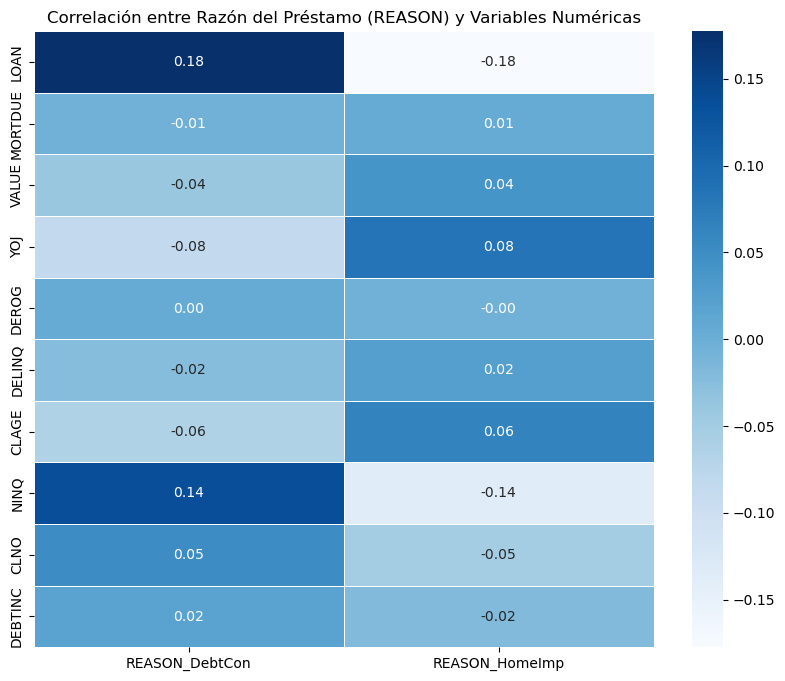

In [41]:

# Crear la matriz de correlación para 'REASON' contra las otras categorías (menos JOB)
df_clean_encoded_reason = pd.get_dummies(df_clean, columns=['REASON'])

# Crear una nueva matriz de correlación que incluya solo las columnas numéricas y las variables de REASON
correlation_matrix_reason = df_clean_encoded_reason[numeric_columns + list(df_clean_encoded_reason.columns[df_clean_encoded_reason.columns.str.contains('REASON')])].corr()

# Filtrar la matriz de correlación para mostrar solo REASON en X y las otras variables numéricas en Y
reason_columns = [col for col in correlation_matrix_reason.columns if 'REASON_' in col]
correlation_subset_reason = correlation_matrix_reason.loc[numeric_columns, reason_columns]

# Crear el heatmap para REASON vs las otras categorías numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_subset_reason, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)

# Título del heatmap
plt.title('Correlación entre Razón del Préstamo (REASON) y Variables Numéricas')

# Mostrar el gráfico
plt.show()



> Las personas que solicitan préstamos para consolidación de deudas tienden a pedir montos más altos y tienen más consultas de crédito recientes.
Las personas que solicitan préstamos para mejoras en la vivienda tienden a pedir montos más bajos y, en general, tienen más estabilidad laboral (más años en el empleo actual).